# VacationPy
----

#### Note
* Keep an eye on your API usage. Use https://developers.google.com/maps/reporting/gmp-reporting as reference for how to monitor your usage and billing.

* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import csv

# Import API key
from api_keys import g_key
gmaps.configure(api_key=g_key)

### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [72]:
file="../Resources/weather_574_.csv"
data=pd.read_csv(file)
del data["Unnamed: 0"]
data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Avarua,-21.2078,-159.7750,78.80,94,40,4.61,CK,1612779975
1,Lebu,-37.6167,-73.6500,57.58,95,30,4.83,CL,1612779975
2,Bluff,-46.6000,168.3333,61.32,76,100,10.67,NZ,1612779975
3,Eilat,29.5581,34.9482,69.80,49,0,6.91,IL,1612779975
4,Pacifica,37.6138,-122.4869,48.99,93,90,4.36,US,1612779975


### Humidity Heatmap
* Configure gmaps.
* Use the Lat and Lng as locations and Humidity as the weight.
* Add Heatmap layer to map.

In [73]:
locations=data[["Lat", "Lng"]]
locations.head()

,Lat,Lng
0,-21.2078,-159.7750
1,-37.6167,-73.6500
2,-46.6000,168.3333
3,29.5581,34.9482
4,37.6138,-122.4869


In [74]:
hu=data["Humidity"].astype(float) 
hu.head()

0    94.0
1    95.0
2    76.0
3    49.0
4    93.0
Name: Humidity, dtype: float64

In [75]:
data.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,21.332789,14.457793,49.417997,70.759582,52.674216,8.465557,1.612780e+09
std,33.013206,88.525731,33.443476,21.923985,39.134709,6.292712,9.050423e+01
min,-54.800000,-175.200000,-43.600000,11.000000,0.000000,0.160000,1.612780e+09
25%,-6.291475,-64.687725,24.277500,60.000000,10.000000,3.675000,1.612780e+09
50%,25.526550,19.793850,61.810000,76.000000,56.500000,6.910000,1.612780e+09
75%,48.354250,85.414350,77.000000,87.000000,90.000000,11.500000,1.612780e+09
max,78.218600,179.316700,96.800000,100.000000,100.000000,42.570000,1.612780e+09


Max Humidity = 100%. This is used for the Max Intensity in the heat map as requested.

In [76]:
fig_all=gmaps.figure(map_type="TERRAIN")
humid_all=gmaps.heatmap_layer(locations, weights=hu, dissipating=False, max_intensity=100, point_radius=4)
fig_all.add_layer(humid_all)
fig_all

Figure(layout=FigureLayout(height='420px'))

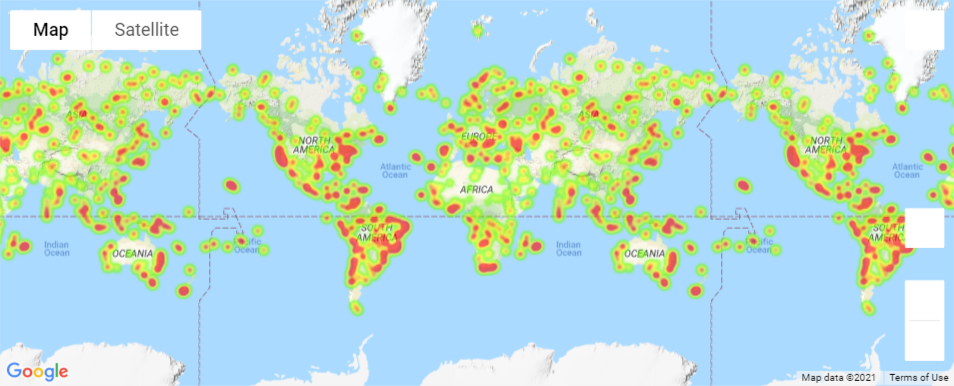

### Create new DataFrame fitting weather criteria
* Narrow down the cities to fit weather conditions.
* Drop any rows will null values.

Optimal locations for vacation

In [77]:
optimal=data.loc[(data["Max_Temp"]<75) & (data["Max_Temp"]>40) & (data["Humidity"]<75.5) & (data["Wind_Speed"]<10) & (data["Cloudiness"]<15), :]
optimal

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
3,Eilat,29.5581,34.9482,69.80,49,0,6.91,IL,1612779975
41,Guaymas,27.9333,-110.9000,57.09,49,0,0.16,MX,1612779983
60,Arica,-18.4750,-70.3042,68.00,68,0,3.44,CL,1612779838
79,Korla,41.7597,86.1469,44.91,49,2,3.15,CN,1612779992
83,Shām Churāsi,31.4997,75.7494,72.00,49,9,7.92,IN,1612779993
109,Cidreira,-30.1811,-50.2056,69.82,73,0,3.98,BR,1612779998
149,Bullhead City,35.1478,-114.5683,48.20,71,1,4.25,US,1612780007
275,Burnie,-41.0667,145.9167,61.00,51,10,9.60,AU,1612780037
286,Tiznit Province,29.5833,-9.5000,54.50,65,9,2.10,MA,1612780039
288,Paraná,-31.7320,-60.5238,66.72,52,0,3.38,AR,1612780040


In [78]:
len(optimal)

20

In [79]:
optimal1=optimal.dropna(how='any')
optimal1=optimal1.reset_index()
optimal1

,index,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,3,Eilat,29.5581,34.9482,69.80,49,0,6.91,IL,1612779975
1,41,Guaymas,27.9333,-110.9000,57.09,49,0,0.16,MX,1612779983
2,60,Arica,-18.4750,-70.3042,68.00,68,0,3.44,CL,1612779838
3,79,Korla,41.7597,86.1469,44.91,49,2,3.15,CN,1612779992
4,83,Shām Churāsi,31.4997,75.7494,72.00,49,9,7.92,IN,1612779993
5,109,Cidreira,-30.1811,-50.2056,69.82,73,0,3.98,BR,1612779998
6,149,Bullhead City,35.1478,-114.5683,48.20,71,1,4.25,US,1612780007
7,275,Burnie,-41.0667,145.9167,61.00,51,10,9.60,AU,1612780037
8,286,Tiznit Province,29.5833,-9.5000,54.50,65,9,2.10,MA,1612780039
9,288,Paraná,-31.7320,-60.5238,66.72,52,0,3.38,AR,1612780040


In [80]:
optimal1.describe()

,index,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,2.000000e+01
mean,273.850000,13.216435,-28.784505,61.531000,54.40000,1.950000,4.271000,1.612780e+09
std,170.144606,25.915243,90.150520,9.532438,15.97498,3.394655,2.582373,8.886033e+01
min,3.000000,-41.066700,-158.154700,44.010000,23.00000,0.000000,0.160000,1.612780e+09
25%,102.500000,7.631225,-105.299975,54.740000,48.25000,0.000000,2.300000,1.612780e+09
50%,295.500000,21.368750,-32.602800,66.100000,51.50000,0.000000,3.440000,1.612780e+09
75%,378.000000,30.062400,5.749350,69.800000,71.00000,1.250000,5.350000,1.612780e+09
max,564.000000,41.759700,145.916700,72.000000,73.00000,10.000000,9.600000,1.612780e+09


Max Humidity = 73%. This is used for the Max Intensity in the related heat map below as requested.

In [81]:
locations_op=optimal1[["Lat", "Lng"]]
locations_op.head()

,Lat,Lng
0,29.5581,34.9482
1,27.9333,-110.9000
2,-18.4750,-70.3042
3,41.7597,86.1469
4,31.4997,75.7494


In [82]:
hu_op=optimal1["Humidity"].astype(float) 
hu_op.head()

0    49.0
1    49.0
2    68.0
3    49.0
4    49.0
Name: Humidity, dtype: float64

In [83]:
fig_op=gmaps.figure(map_type="TERRAIN")
humid_op=gmaps.heatmap_layer(locations_op, weights=hu_op, dissipating=False, max_intensity=73, point_radius=4)
fig_op.add_layer(humid_op)
fig_op

Figure(layout=FigureLayout(height='420px'))

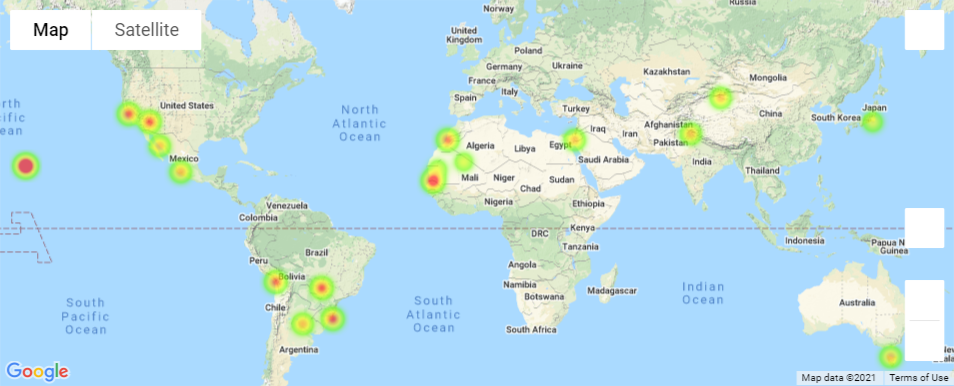

### Hotel Map
* Store into variable named `hotel_df`.
* Add a "Hotel Name" column to the DataFrame.
* Set parameters to search for hotels with 5000 meters.
* Hit the Google Places API for each city's coordinates.
* Store the first Hotel result into the DataFrame.
* Plot markers on top of the heatmap.

In [84]:
area_h=[]
name_h=[]
lat_h=[]
lng_h=[]
country_h=[]
city_h=[]
b=[]

url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json?"
for a in range(len(locations_op)):
    try:
        op_lat=locations_op["Lat"][a]
        op_lng=locations_op["Lng"][a]
        q_url = f"{url}location={op_lat},{op_lng}&radius=5000&type=hotel&keyword=hotel&opennow&language=en&key={g_key}"
        hn=requests.get(q_url).json()
        area_h.append(hn["results"][0]["vicinity"])
        name_h.append(hn["results"][0]["name"])
        lat_h.append(hn["results"][0]["geometry"]["location"]["lat"])
        lng_h.append(hn["results"][0]["geometry"]["location"]["lng"])
        country_h.append(optimal1["Country"][a])
        city_h.append(optimal1["City"][a])
        b.append(a)
        print(f"Processing Record {a} | {optimal1['City'][a]}, {optimal1['Country'][a]}")
        
    except IndexError:
        print(f"Hotel not found. Skipping...")
        
print(f"Data Retrieval Complete")


Processing Record 0 | Eilat, IL
Processing Record 1 | Guaymas, MX
Processing Record 2 | Arica, CL
Hotel not found. Skipping...
Hotel not found. Skipping...
Processing Record 5 | Cidreira, BR
Processing Record 6 | Bullhead City, US
Hotel not found. Skipping...
Hotel not found. Skipping...
Processing Record 9 | Paraná, AR
Hotel not found. Skipping...
Hotel not found. Skipping...
Processing Record 12 | Nānākuli, US
Processing Record 13 | San Jose, US
Hotel not found. Skipping...
Hotel not found. Skipping...
Processing Record 16 | Makakilo City, US
Processing Record 17 | Tateyama, JP
Hotel not found. Skipping...
Processing Record 19 | Atar, MR
Data Retrieval Complete


In [85]:
hn["results"]

[{'business_status': 'OPERATIONAL',
  'geometry': {'location': {'lat': 20.4933655, 'lng': -13.0594214},
   'viewport': {'northeast': {'lat': 20.49483227989272,
     'lng': -13.05858692010728},
    'southwest': {'lat': 20.49213262010728, 'lng': -13.06128657989272}}},
  'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/lodging-71.png',
  'name': 'Auberge Andaloss',
  'opening_hours': {'open_now': True},
  'photos': [{'height': 2448,
    'html_attributions': ['<a href="https://maps.google.com/maps/contrib/109511432148181877670">ŠÆĶĶ RM</a>'],
    'photo_reference': 'ATtYBwI5w9yVnFLd46vwOlTKcAGn-G13t3gbMG62O3GBOeeLh6g8n5cojeiBCq4OWWwVKGyxlupr1xDup2J3Dm4fta5ZU9TSkZOyBrKxCztw6lVowG42vpOtFcFYcOOZY-jsCf-2WB30yfWhWuJXrdDwbVV1mqiNEpis5mFmobyjM32vKJBp',
    'width': 3264}],
  'place_id': 'ChIJ4xdDN_ObhA4Rpdo9MiWl6UU',
  'plus_code': {'compound_code': 'FWVR+86 Atar, Mauritania',
   'global_code': '7CG8FWVR+86'},
  'rating': 3.8,
  'reference': 'ChIJ4xdDN_ObhA4Rpdo9MiWl6UU',
  's

In [86]:
optimal2=pd.DataFrame({
    "City" : optimal1["City"][b], 
    "Country" : optimal1["Country"][b],
    #"check Country" : country_h,
    "Lat" : optimal1["Lat"][b], 
    "Lng" : optimal1["Lng"][b], 
    "Max_Temp" : optimal1["Max_Temp"][b], 
    "Humidity" : optimal1["Humidity"][b],
    "Cloudiness" : optimal1["Cloudiness"][b],
    "Wind_Speed" : optimal1["Wind_Speed"][b],
    "Analysis Date" : optimal1["Date"][b],
    "Hotel Name" : name_h,
    #"Hotel_Area" : area_h,
    "Hotel_lat" : lat_h,
    "Hotel_lng" : lng_h
})
optimal2

,City,Country,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Analysis Date,Hotel Name,Hotel_lat,Hotel_lng
0,Eilat,IL,29.5581,34.9482,69.80,49,0,6.91,1612779975,Classic Inn Hotel - Hotel Classic No,29.558380,34.949402
1,Guaymas,MX,27.9333,-110.9000,57.09,49,0,0.16,1612779983,Hotel Playa de Cortes,27.911880,-110.946449
2,Arica,CL,-18.4750,-70.3042,68.00,68,0,3.44,1612779838,Hotel Avenida,-18.485400,-70.291400
5,Cidreira,BR,-30.1811,-50.2056,69.82,73,0,3.98,1612779998,Pousada Atlântico Apart Hotel,-30.178379,-50.203824
6,Bullhead City,US,35.1478,-114.5683,48.20,71,1,4.25,1612780007,Days Inn by Wyndham Bullhead City,35.146201,-114.568323
9,Paraná,AR,-31.7320,-60.5238,66.72,52,0,3.38,1612780040,HOTEL BRISTOL- ABIERTO TODO EL AÑO,-31.740468,-60.518212
12,Nānākuli,US,21.3906,-158.1547,66.00,72,1,4.54,1612780133,Polynesia Lodging & Conference,21.386510,-158.146907
13,San Jose,US,37.3394,-121.8950,48.99,71,1,3.44,1612780122,Fairmont San Jose,37.333143,-121.888736
16,Makakilo City,US,21.3469,-158.0858,66.20,72,1,4.83,1612780080,Hampton Inn & Suites Oahu/Kapolei,21.332245,-158.052334
17,Tateyama,JP,34.9833,139.8667,44.01,32,5,1.99,1612780175,Hotel Mai Grant,34.994628,139.862165


In [87]:
#Creating DataFrame with 10 rows or less as requested
optimal3=optimal2.drop(optimal2.index[6])
optimal3

,City,Country,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Analysis Date,Hotel Name,Hotel_lat,Hotel_lng
0,Eilat,IL,29.5581,34.9482,69.80,49,0,6.91,1612779975,Classic Inn Hotel - Hotel Classic No,29.558380,34.949402
1,Guaymas,MX,27.9333,-110.9000,57.09,49,0,0.16,1612779983,Hotel Playa de Cortes,27.911880,-110.946449
2,Arica,CL,-18.4750,-70.3042,68.00,68,0,3.44,1612779838,Hotel Avenida,-18.485400,-70.291400
5,Cidreira,BR,-30.1811,-50.2056,69.82,73,0,3.98,1612779998,Pousada Atlântico Apart Hotel,-30.178379,-50.203824
6,Bullhead City,US,35.1478,-114.5683,48.20,71,1,4.25,1612780007,Days Inn by Wyndham Bullhead City,35.146201,-114.568323
9,Paraná,AR,-31.7320,-60.5238,66.72,52,0,3.38,1612780040,HOTEL BRISTOL- ABIERTO TODO EL AÑO,-31.740468,-60.518212
13,San Jose,US,37.3394,-121.8950,48.99,71,1,3.44,1612780122,Fairmont San Jose,37.333143,-121.888736
16,Makakilo City,US,21.3469,-158.0858,66.20,72,1,4.83,1612780080,Hampton Inn & Suites Oahu/Kapolei,21.332245,-158.052334
17,Tateyama,JP,34.9833,139.8667,44.01,32,5,1.99,1612780175,Hotel Mai Grant,34.994628,139.862165
19,Atar,MR,20.5169,-13.0499,57.20,23,0,2.30,1612780185,Auberge Andaloss,20.493365,-13.059421


In [88]:
hotel_df3=pd.DataFrame({  
    "City" : optimal3["City"], 
    "Country" : optimal3["Country"],
    "Latitude" : optimal3["Lat"],
    "Longitude" : optimal3["Lng"],
    "Hotel Name" : optimal3["Hotel Name"]
})
hotel_df3

,City,Country,Latitude,Longitude,Hotel Name
0,Eilat,IL,29.5581,34.9482,Classic Inn Hotel - Hotel Classic No
1,Guaymas,MX,27.9333,-110.9000,Hotel Playa de Cortes
2,Arica,CL,-18.4750,-70.3042,Hotel Avenida
5,Cidreira,BR,-30.1811,-50.2056,Pousada Atlântico Apart Hotel
6,Bullhead City,US,35.1478,-114.5683,Days Inn by Wyndham Bullhead City
9,Paraná,AR,-31.7320,-60.5238,HOTEL BRISTOL- ABIERTO TODO EL AÑO
13,San Jose,US,37.3394,-121.8950,Fairmont San Jose
16,Makakilo City,US,21.3469,-158.0858,Hampton Inn & Suites Oahu/Kapolei
17,Tateyama,JP,34.9833,139.8667,Hotel Mai Grant
19,Atar,MR,20.5169,-13.0499,Auberge Andaloss


In [89]:
hotel_df3.describe()

,Latitude,Longitude
count,10.000000,10.000000
mean,12.643760,-52.471770
std,27.977196,88.079594
min,-31.732000,-158.085800
25%,-8.727025,-113.651225
50%,24.640100,-65.414000
75%,33.627000,-22.338825
max,37.339400,139.866700


In [90]:
hotel_df=pd.DataFrame({  
    "Hotel Name" : optimal3["Hotel Name"],
    "City" : optimal3["City"], 
    "Country" : optimal3["Country"],
    "Hotel_Lat" : optimal3["Hotel_lat"],
    "Hotel_Lng" : optimal3["Hotel_lng"],
    "Humidity" : optimal3["Humidity"]
})
hotel_df

,Hotel Name,City,Country,Hotel_Lat,Hotel_Lng,Humidity
0,Classic Inn Hotel - Hotel Classic No,Eilat,IL,29.558380,34.949402,49
1,Hotel Playa de Cortes,Guaymas,MX,27.911880,-110.946449,49
2,Hotel Avenida,Arica,CL,-18.485400,-70.291400,68
5,Pousada Atlântico Apart Hotel,Cidreira,BR,-30.178379,-50.203824,73
6,Days Inn by Wyndham Bullhead City,Bullhead City,US,35.146201,-114.568323,71
9,HOTEL BRISTOL- ABIERTO TODO EL AÑO,Paraná,AR,-31.740468,-60.518212,52
13,Fairmont San Jose,San Jose,US,37.333143,-121.888736,71
16,Hampton Inn & Suites Oahu/Kapolei,Makakilo City,US,21.332245,-158.052334,72
17,Hotel Mai Grant,Tateyama,JP,34.994628,139.862165,32
19,Auberge Andaloss,Atar,MR,20.493365,-13.059421,23


In [91]:
hotel_df.describe()

,Hotel_Lat,Hotel_Lng,Humidity
count,10.000000,10.000000,10.000000
mean,12.636560,-52.471713,56.000000
std,27.977237,88.076233,18.006172
min,-31.740468,-158.052334,23.000000
25%,-8.740708,-113.662855,49.000000
50%,24.622062,-65.404806,60.000000
75%,33.635566,-22.345522,71.000000
max,37.333143,139.862165,73.000000


In [92]:
hotel_df1=pd.DataFrame({  
    "Hotel Name" : optimal3["Hotel Name"],
    "City" : optimal3["City"], 
    "Country" : optimal3["Country"]
})
hotel_df1

,Hotel Name,City,Country
0,Classic Inn Hotel - Hotel Classic No,Eilat,IL
1,Hotel Playa de Cortes,Guaymas,MX
2,Hotel Avenida,Arica,CL
5,Pousada Atlântico Apart Hotel,Cidreira,BR
6,Days Inn by Wyndham Bullhead City,Bullhead City,US
9,HOTEL BRISTOL- ABIERTO TODO EL AÑO,Paraná,AR
13,Fairmont San Jose,San Jose,US
16,Hampton Inn & Suites Oahu/Kapolei,Makakilo City,US
17,Hotel Mai Grant,Tateyama,JP
19,Auberge Andaloss,Atar,MR


In [93]:
len(hotel_df1)

10

In [94]:
locations_oph=optimal3[["Lat", "Lng"]]
locations_oph

,Lat,Lng
0,29.5581,34.9482
1,27.9333,-110.9000
2,-18.4750,-70.3042
5,-30.1811,-50.2056
6,35.1478,-114.5683
9,-31.7320,-60.5238
13,37.3394,-121.8950
16,21.3469,-158.0858
17,34.9833,139.8667
19,20.5169,-13.0499


In [95]:
hu_oph=optimal3["Humidity"].astype(float) 
hu_oph

0     49.0
1     49.0
2     68.0
5     73.0
6     71.0
9     52.0
13    71.0
16    72.0
17    32.0
19    23.0
Name: Humidity, dtype: float64

In [96]:
locations_mark= hotel_df[["Hotel_Lat", "Hotel_Lng"]]
locations_mark

,Hotel_Lat,Hotel_Lng
0,29.558380,34.949402
1,27.911880,-110.946449
2,-18.485400,-70.291400
5,-30.178379,-50.203824
6,35.146201,-114.568323
9,-31.740468,-60.518212
13,37.333143,-121.888736
16,21.332245,-158.052334
17,34.994628,139.862165
19,20.493365,-13.059421


In [97]:
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""

In [98]:
hotel_info = [info_box_template.format(**row) for index, row in hotel_df1.iterrows()]

In [99]:
fig_oph=gmaps.figure(map_type="TERRAIN")

humid_oph=gmaps.heatmap_layer(locations_oph, weights=hu_oph, dissipating=False, max_intensity=74, point_radius=4)
markers=gmaps.marker_layer(locations_mark,
                           info_box_content=hotel_info
                          )
fig_oph.add_layer(humid_oph)
fig_oph.add_layer(markers)
fig_oph

Figure(layout=FigureLayout(height='420px'))

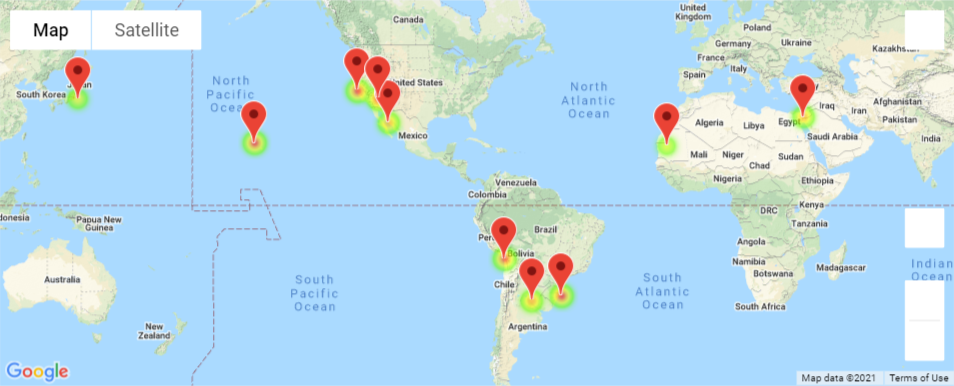

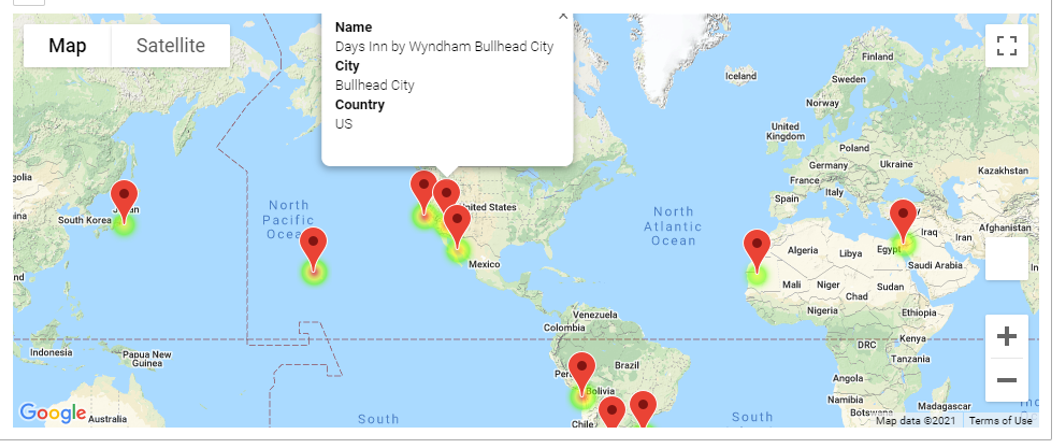